In [1]:
import matplotlib.pyplot as plt
import wntr
import wntr.network.controls as controls
import sqlite3
import csv
import time
import pandas as pd
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
def do_plot(dd, series, legends, title, labels, xlim=None, ylim=None):
    i = 0
    for serie in series:
        serie.plot(label=legends[i], ax=dd)        
        i = i+1
    plt.title(title)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    if xlim and ylim:               
        plt.xlim(left=xlim[0], right=xlim[1])
    plt.legend()
    plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
    plt.grid(True)    

In [3]:
folder_in = '2021_data/30_week_simulation'
filename = 'physical_process.csv'
subplot_hspace = 1.8
subplot_wspace = 0.1
subplot_height = 8
subplot_width = 5

FileNotFoundError: [Errno 2] No such file or directory: '2021_data/30_week_simulation/week_3/physical_process.csv'

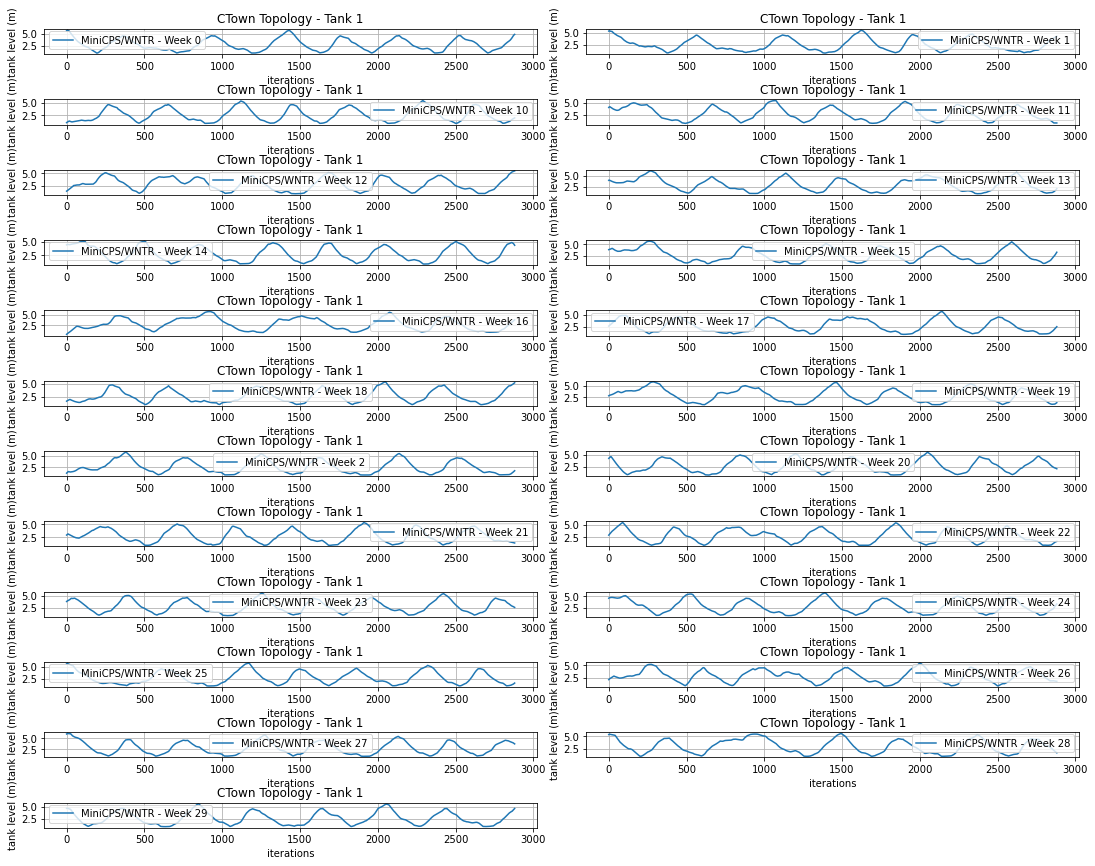

In [4]:
# Get all the folders in in the path (we could check for week_x pattern)
file_expr = folder_in + '/*'
paths = glob.glob(file_expr)
directories = []
for path in paths:    
    directories.append(path.split('\\')[1])

# Find the number of subplots
num_plots = len(directories)
subplot_y_num = 2
subplot_x_num = (num_plots / subplot_y_num) + 1

plot_index = 1
f = plt.figure(figsize=(20,15))
for directory in directories:
    #print(folder_in + '/' + directory)
    current_data = pd.read_csv(folder_in + '/' + directory +'/' + filename)
    dd = plt.subplot(subplot_x_num,subplot_y_num,plot_index)
    f.set_figheight(subplot_height)
    f.set_figwidth(subplot_width)
    # We just print T1 for reference
    do_plot(dd,[current_data["T1_LEVEL"]],
            ['MiniCPS/WNTR - Week ' + str(directory.split('_')[1])],'CTown Topology - Tank 1',['iterations', 'tank level (m)'])
    plot_index += 1